# Getting and preparing the data

In [524]:
import pandas as pd
import numpy as np
import random

In [525]:
# download the data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

--2023-08-03 22:05:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls.6’

default of credit c     [        <=>         ]   5.28M  2.45MB/s    in 2.2s    

2023-08-03 22:05:37 (2.45 MB/s) - ‘default of credit card clients.xls.6’ saved [5539328]



In [526]:
# load the data from Excel
df = pd.read_excel("default of credit card clients.xls", skiprows=1, index_col=0)

# rename columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

months = ["sep", "aug", "jul", "jun", "may", "apr"]
variables = ["payment_status", "bill_statement", "previous_payment"]
new_col_names = [x + "_" + y for x in variables for y in months]
rename_dict = {x: y for x, y in zip(df.loc[:, "pay_0":"pay_amt6"].columns, new_col_names)}
df.rename(columns=rename_dict, inplace=True)

# create dicts to map number to strings
gender_dict = {1: "Male",
               2: "Female"}
education_dict = {0: "Others",
                  1: "Graduate School",
                  2: "University",
                  3: "High School",
                  4: "Others",
                  5: "Others",
                  6: "Others"}
marital_status_dict = {0: "Others",
                       1: "Married",
                       2: "Single",
                       3: "Others"}
payment_status = {-2: "Unknown",
                  -1: "Paid duly",
                  0: "Unknown",
                  1: "Payment delayed 1 month",
                  2: "Payment delayed 2 months",
                  3: "Payment delayed 3 months",
                  4: "Payment delayed 4 months",
                  5: "Payment delayed 5 months",
                  6: "Payment delayed 6 months",
                  7: "Payment delayed 7 months",
                  8: "Payment delayed 8 months",
                  9: "Payment delayed 9+ months"}

# map numbers to string
df["sex"] = df["sex"].map(gender_dict)
df["education"] = df["education"].map(education_dict)
df["marriage"] = df["marriage"].map(marital_status_dict)

for column in [x for x in df.columns if ("status" in x)]:
    df[column] = df[column].map(payment_status)

# define the ratio of missing values
RATIO_MISSING = 0.005

# input missing values to selected columns
random_state = np.random.RandomState(42)
for column in ["sex", "education", "marriage", "age"]:
    df.loc[df.sample(frac=RATIO_MISSING, random_state=random_state).index, column] = ""

# reset index
df.reset_index(drop=True, inplace=True)

# save to csv
df.to_csv("./datasets/credit_card_default.csv", index=False)

In [527]:
df.head()

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24,Payment delayed 2 months,Payment delayed 2 months,Paid duly,Paid duly,Unknown,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26,Paid duly,Payment delayed 2 months,Unknown,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34,Unknown,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37,Unknown,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57,Paid duly,Unknown,Paid duly,Unknown,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Loading data and managing data types

## How to do it

### 1. Import the libraries

In [528]:
import pandas as pd

### 2. Load the data from the CSV file

In [529]:
df = pd.read_csv("./datasets/credit_card_default.csv", 
                 na_values="")
df.head()

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Paid duly,Paid duly,Unknown,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26.0,Paid duly,Payment delayed 2 months,Unknown,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57.0,Paid duly,Unknown,Paid duly,Unknown,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 3. View the summary of the DataFrame

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_bal                   30000 non-null  int64  
 1   sex                         29850 non-null  object 
 2   education                   29850 non-null  object 
 3   marriage                    29850 non-null  object 
 4   age                         29850 non-null  float64
 5   payment_status_sep          30000 non-null  object 
 6   payment_status_aug          30000 non-null  object 
 7   payment_status_jul          30000 non-null  object 
 8   payment_status_jun          30000 non-null  object 
 9   payment_status_may          30000 non-null  object 
 10  payment_status_apr          30000 non-null  object 
 11  bill_statement_sep          30000 non-null  int64  
 12  bill_statement_aug          30000 non-null  int64  
 13  bill_statement_jul          300

### 4. Define a function for inspecting the exact memory usage of a DataFrame

In [531]:
def get_df_memory_usage(df, top_columns=5):
    """
    Function for quick analysis of a pandas DataFrame's memory usage.
    It prints the 'top_columns' columns in terms of memory usage
    and the total usage of the DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be inspected
    top_columns : int
        Number of top columns (in terms of memory usage) to display
    """
    print("Memory usage ----")
    memory_per_column = df.memory_usage(deep=True) / (1024 ** 2)
    print(f"Top {top_columns} columns by memory (MB):")
    print(memory_per_column.sort_values(ascending=False).head(top_columns))
    print(f"Total size: {memory_per_column.sum():.2f} MB")

In [532]:
get_df_memory_usage(df, 5)

Memory usage ----
Top 5 columns by memory (MB):
education             1.965001
payment_status_sep    1.948919
payment_status_aug    1.914518
payment_status_jul    1.910680
payment_status_jun    1.898806
dtype: float64
Total size: 20.44 MB


### 5. Convert the columns with object data type into category type

In [533]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] =df[object_columns].astype('category')

get_df_memory_usage(df)

Memory usage ----
Top 5 columns by memory (MB):
bill_statement_sep      0.228882
bill_statement_aug      0.228882
previous_payment_apr    0.228882
previous_payment_may    0.228882
previous_payment_jun    0.228882
dtype: float64
Total size: 3.70 MB


### 6. Downcast the numeric columns to integers

In [534]:
numeric_columns = df.select_dtypes(include="number").columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], downcast="integer")

get_df_memory_usage(df)

Memory usage ----
Top 5 columns by memory (MB):
age                     0.228882
bill_statement_sep      0.114441
limit_bal               0.114441
previous_payment_jun    0.114441
previous_payment_jul    0.114441
dtype: float64
Total size: 2.01 MB


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   30000 non-null  int32   
 1   sex                         29850 non-null  category
 2   education                   29850 non-null  category
 3   marriage                    29850 non-null  category
 4   age                         29850 non-null  float64 
 5   payment_status_sep          30000 non-null  category
 6   payment_status_aug          30000 non-null  category
 7   payment_status_jul          30000 non-null  category
 8   payment_status_jun          30000 non-null  category
 9   payment_status_may          30000 non-null  category
 10  payment_status_apr          30000 non-null  category
 11  bill_statement_sep          30000 non-null  int32   
 12  bill_statement_aug          30000 non-null  int32   
 13  bill_statement_j

### 7. Downcast the age column using the float data type

In [536]:
df['age'] = pd.to_numeric(df['age'], downcast='float')

get_df_memory_usage(df)

Memory usage ----
Top 5 columns by memory (MB):
bill_statement_sep      0.114441
limit_bal               0.114441
previous_payment_jun    0.114441
previous_payment_jul    0.114441
previous_payment_aug    0.114441
dtype: float64
Total size: 1.90 MB


## There's more

In [537]:
# Assign the data types to columns while loading the data using the `pd.read_csv` method
columns_dtypes = {
    "education": "category",
    "marriage": "category",
    "sex": "category"
}

df_cat = pd.read_csv("./datasets/credit_card_default.csv",
                     na_values="", dtype=columns_dtypes)

get_df_memory_usage(df_cat)

Memory usage ----
Top 5 columns by memory (MB):
payment_status_sep    1.948919
payment_status_aug    1.914518
payment_status_jul    1.910680
payment_status_jun    1.898806
payment_status_apr    1.891921
dtype: float64
Total size: 14.97 MB


# Exploratory data analysis

## How to do it

### 1. Import the libraries

In [538]:
import pandas as pd
import numpy as np
import seaborn as sns

### 2. Get summary statistics of the numeric variables

In [539]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
age,29850.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
bill_statement_sep,30000.0,51223.33,73635.86,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_statement_aug,30000.0,49179.08,71173.77,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_statement_jul,30000.0,47013.15,69349.39,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_statement_jun,30000.0,43262.95,64332.86,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_statement_may,30000.0,40311.40,60797.16,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_statement_apr,30000.0,38871.76,59554.11,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sep,30000.0,5663.58,16563.28,0.0,1000.00,2100.0,5006.00,873552.0
previous_payment_aug,30000.0,5921.16,23040.87,0.0,833.00,2009.0,5000.00,1684259.0


### 3. Get summary statistics of the categorical variables

In [540]:
# df.describe(include='object').transpose()
df.describe(include='category').transpose()

,count,unique,top,freq
sex,29850,2,Female,18027
education,29850,4,University,13960
marriage,29850,3,Single,15891
payment_status_sep,30000,10,Unknown,17496
payment_status_aug,30000,10,Unknown,19512
payment_status_jul,30000,10,Unknown,19849
payment_status_jun,30000,10,Unknown,20803
payment_status_may,30000,9,Unknown,21493
payment_status_apr,30000,9,Unknown,21181


In [541]:
# Alternatively, we can get the summary statistics of all columns in one table using the following snippet
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,NaN,NaN,NaN,167484.322667,129747.661567,10000.0,50000.0,140000.0,240000.0,1000000.0
sex,29850,2,Female,18027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,29850,4,University,13960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marriage,29850,3,Single,15891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,29850.0,NaN,NaN,NaN,35.490116,9.217748,21.0,28.0,34.0,41.0,79.0
payment_status_sep,30000,10,Unknown,17496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_status_aug,30000,10,Unknown,19512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_status_jul,30000,10,Unknown,19849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_status_jun,30000,10,Unknown,20803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_status_may,30000,9,Unknown,21493,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Plot the distribution of age and, additionally, split it by gender

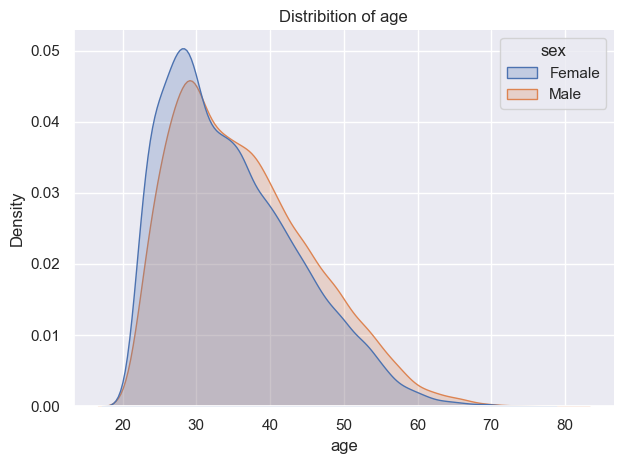

In [542]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.kdeplot(data=df, x="age",
                 hue="sex", common_norm=False,
                 fill=True)
ax.set_title("Distribition of age")

sns.despine()
plt.tight_layout()

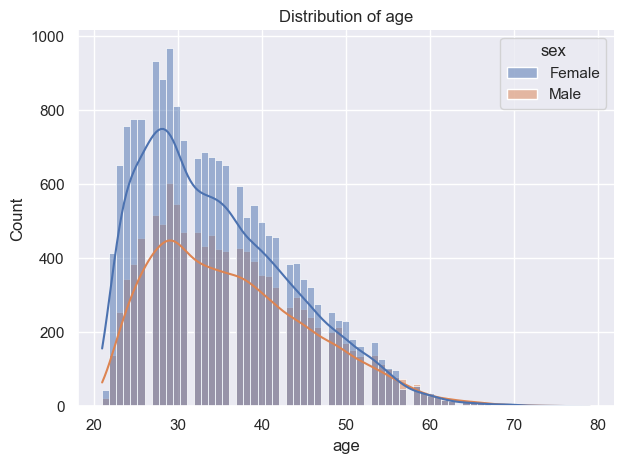

In [543]:
# we can create a histogram (together with the KDE)

ax = sns.histplot(data=df.dropna(), x="age", hue="sex", kde=True)
ax.set_title("Distribution of age")

sns.despine()
plt.tight_layout()

We noticed some gaps in the plot and the reason for this is the binning. Below, we created the same histogram using sns.countplot and plotly_express. By doing so, each value of age has a separate bin and we can inspect the plot in detail. There are no such spikes in the following plots

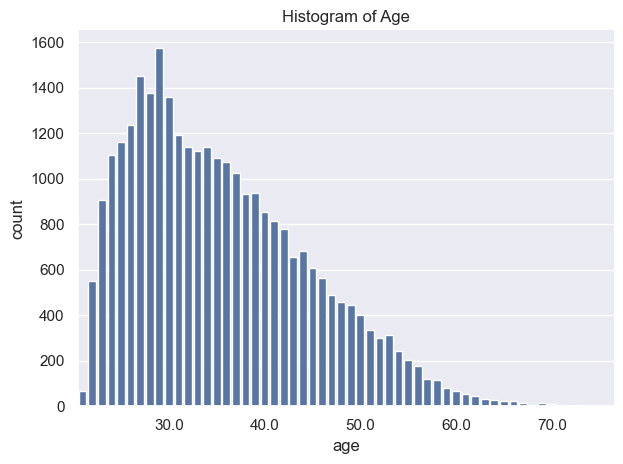

In [544]:
ax = sns.countplot(data=df.dropna(), x="age", color="b")

for ind, label in enumerate(ax.get_xticklabels()):
    if int(float(label.get_text())) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set_title("Histogram of Age")

sns.despine()
plt.tight_layout()

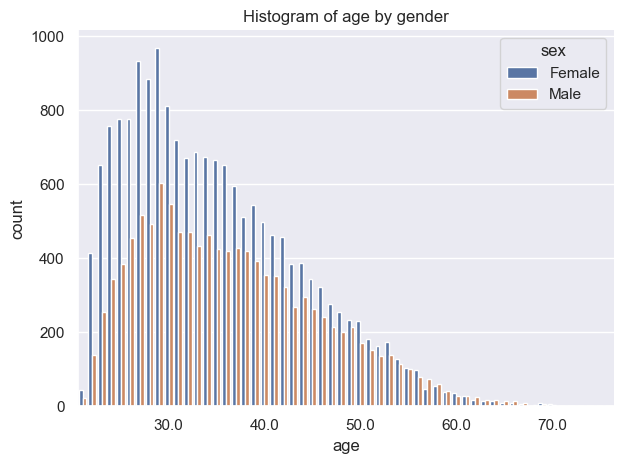

In [545]:
ax = sns.countplot(data=df.dropna(), x="age", hue="sex")

for ind, label in enumerate(ax.get_xticklabels()):
    if int(float(label.get_text())) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set_title("Histogram of age by gender")

sns.despine()
plt.tight_layout()

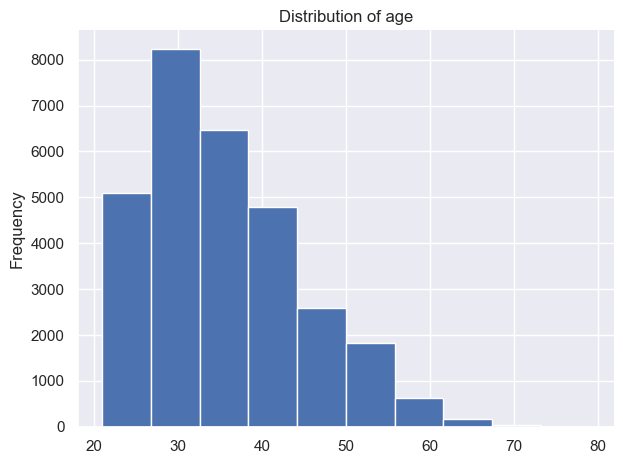

In [546]:
df["age"].plot(kind="hist", title="Distribution of age")

sns.despine()
plt.tight_layout()

### 5. Create `pairplot` of selected variables

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_51100/426388358.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


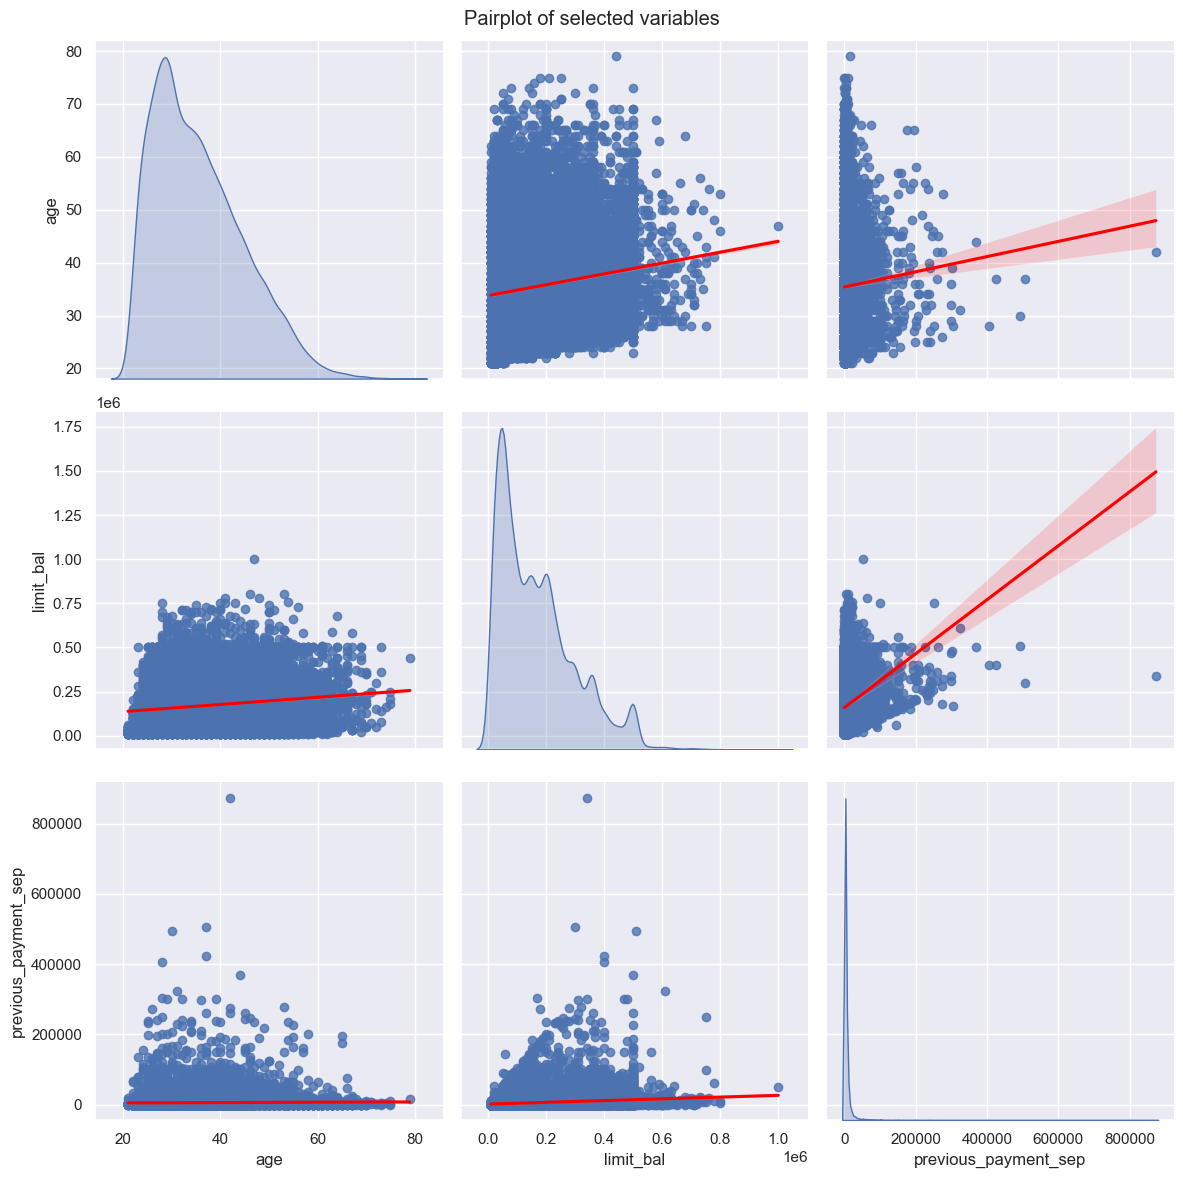

In [547]:
COLS_TO_PLOT = ['age', 'limit_bal', 'previous_payment_sep']

pair_plot = sns.pairplot(df[COLS_TO_PLOT],
                         kind='reg',
                         diag_kind='kde',
                         height=4,
                         plot_kws={'line_kws':{'color':'red'}})
pair_plot.fig.suptitle('Pairplot of selected variables')

sns.despine()
plt.tight_layout()

Additionally, we can separate the genders by specifying the hue argument

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


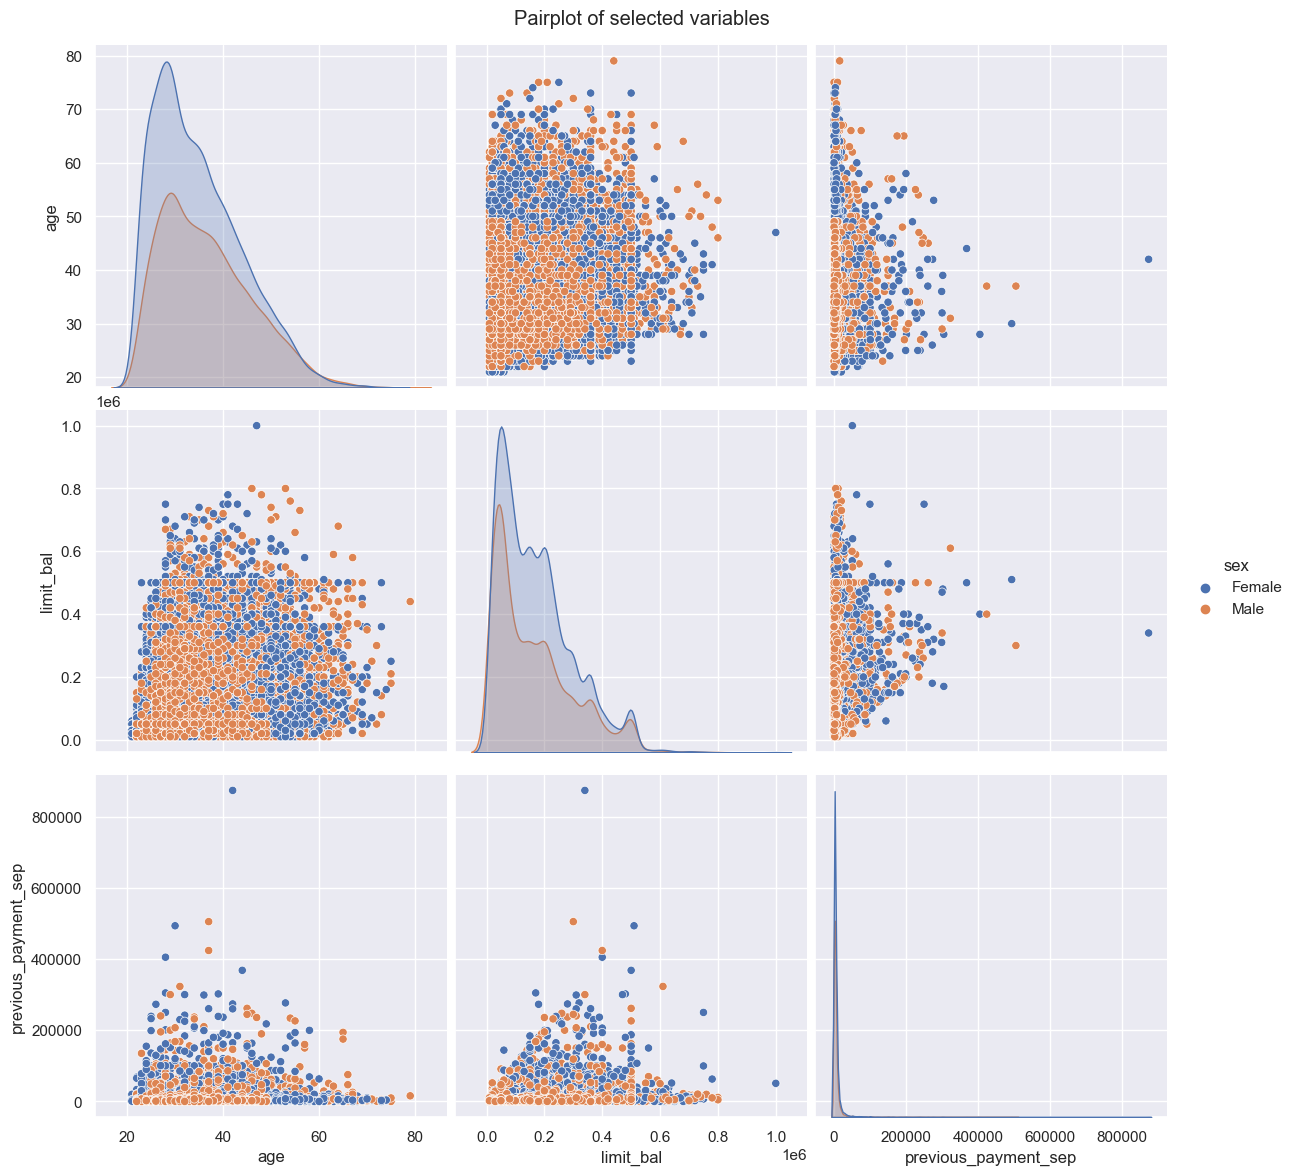

In [548]:
pair_plot = sns.pairplot(data=df,
                         x_vars=COLS_TO_PLOT,
                         y_vars=COLS_TO_PLOT,
                         hue='sex',
                         height=4)
pair_plot.fig.suptitle('Pairplot of selected variables')
plt.subplots_adjust(top=0.95)

### 6. Analyze the relationship between age and limit balance

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_51100/105073502.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


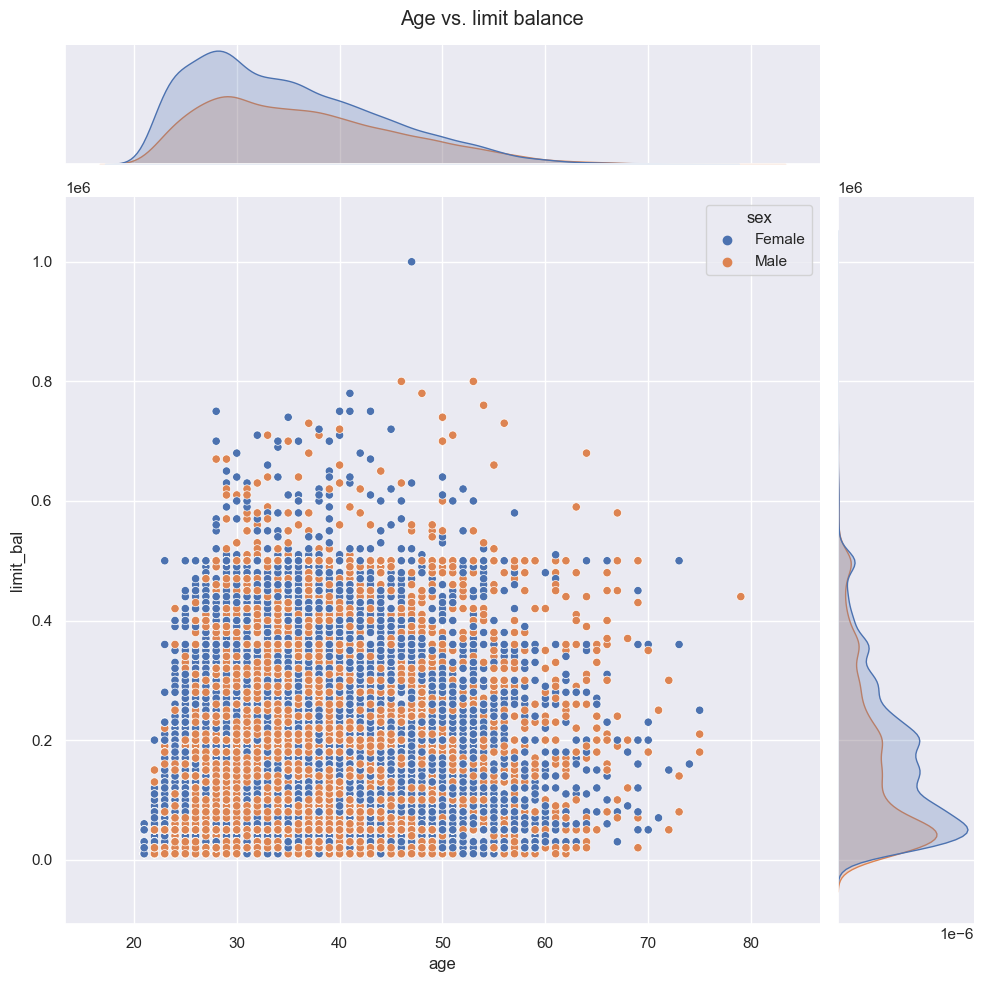

In [549]:
ax = sns.jointplot(data=df, x='age', y='limit_bal',
                   hue='sex', height=10)
ax.fig.suptitle('Age vs. limit balance')

sns.despine()
plt.tight_layout()

### 7. Define and run a function for plotting the correlation heatmap

In [550]:
def plot_correlation_matrix(corr_mat, annotate=False):
    """
    Function for plotting the correlation heatmap.
    It masks the irrelenact fields.
    
    Paramters
    ---------
    corr_mat: pandas.DataFrame
        Correlation matrix of the features
    """

    # temporarily change style
    sns.set(style='white')
    # mask the upper triangle
    mask = np.zeros_like(corr_mat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    # set up the matplotlib figure
    fig, ax = plt.subplots()
    # set up custom diverging colormap
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    # plot the heatmap
    sns.heatmap(corr_mat, mask=mask, cmap=cmap, 
                annot=annotate, square=True, linewidths=.5,
                cbar_kws={'shrink': .5}, ax=ax)
    ax.set_title('Correlation matrix', fontsize=16)
    # change back to darkgrid style
    sns.set(style='darkgrid')

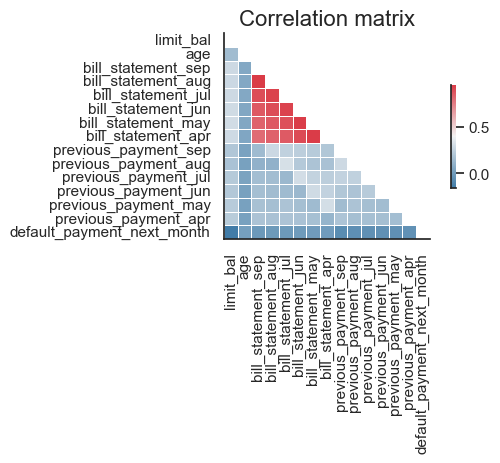

In [551]:
corr_mat = df.select_dtypes(include="number").corr()
plot_correlation_matrix(corr_mat)

sns.despine()
plt.tight_layout()

We can also directly inspect the correlation between the features (numerical) and the target

In [552]:
df.select_dtypes(include='number').corr()[["default_payment_next_month"]]

,default_payment_next_month
limit_bal,-0.153520
age,0.014491
bill_statement_sep,-0.019644
bill_statement_aug,-0.014193
bill_statement_jul,-0.014076
bill_statement_jun,-0.010156
bill_statement_may,-0.006760
bill_statement_apr,-0.005372
previous_payment_sep,-0.072929
previous_payment_aug,-0.058579


### 8. Analyze the distribution of age in groups using boxplots

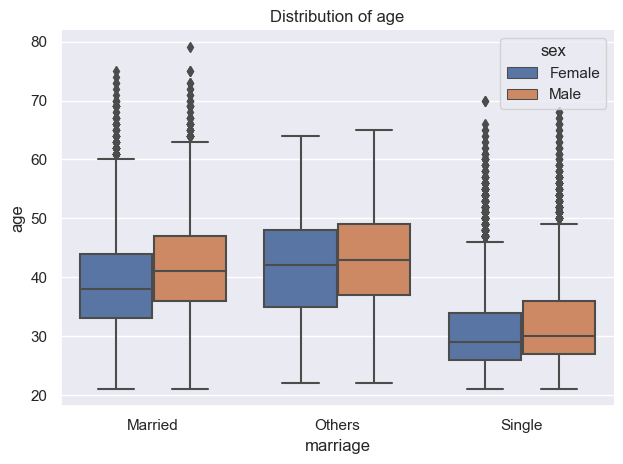

In [553]:
ax = sns.boxplot(data=df, y='age', x='marriage', hue='sex')
ax.set_title('Distribution of age')

sns.despine()
plt.tight_layout()

### 9. Plot the distribution of limit balance for each gender and education level

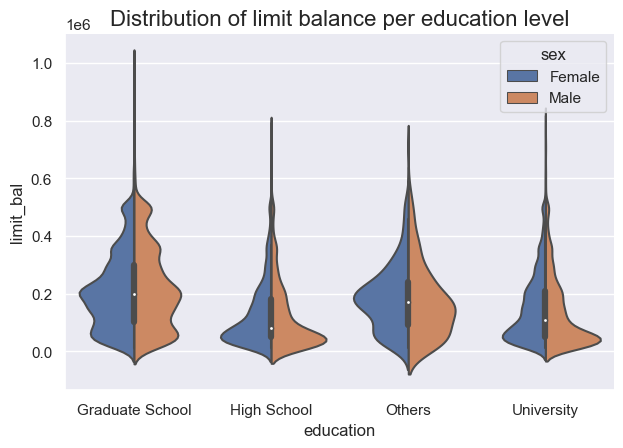

In [554]:
ax = sns.violinplot(x="education", y="limit_bal", 
                    hue="sex", split=True, data=df)
ax.set_title(
    "Distribution of limit balance per education level",
    fontsize=16
)

sns.despine()
plt.tight_layout()

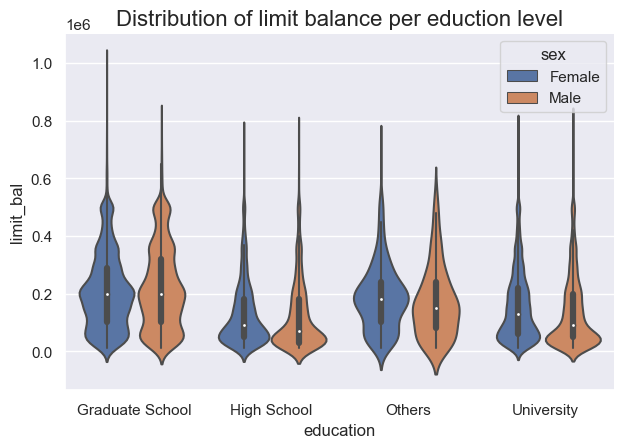

In [555]:
# the following code plots the same information, without spliting the violin plot

ax = sns.violinplot(x="education", y="limit_bal", 
                    hue="sex", data=df)
ax.set_title('Distribution of limit balance per eduction level',
             fontsize=16)
sns.despine()
plt.tight_layout()

### 10. Investigate the distribution of the target variable per gender and education level

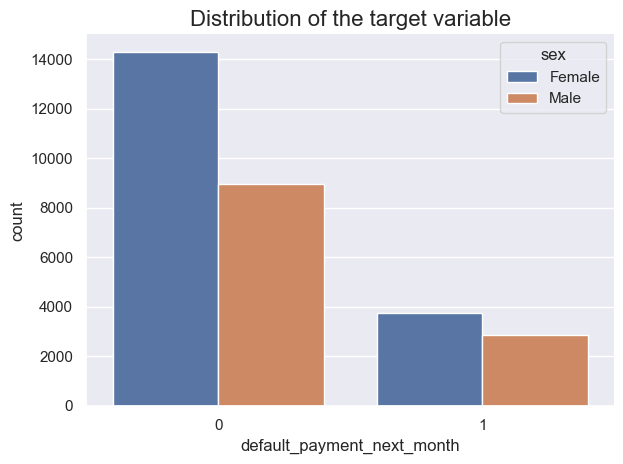

In [556]:
ax = sns.countplot(x="default_payment_next_month", hue="sex", 
                   data=df, orient="h")
ax.set_title("Distribution of the target variable", fontsize=16)

sns.despine()
plt.tight_layout()

### 11. Investigate the percentage of defaults per education level

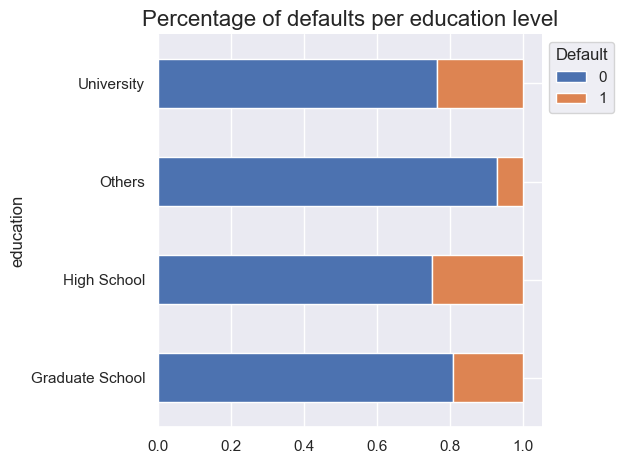

In [557]:
ax = df.groupby("education")["default_payment_next_month"] \
.value_counts(normalize=True).unstack(1).plot.barh(stacked=True)
ax.set_title("Percentage of defaults per education level", fontsize=16)
ax.legend(title="Default", bbox_to_anchor=(1, 1))

sns.despine()
plt.tight_layout()

## There's more

In [558]:
# pandas-profiling is changed into ydata-profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Loan Default Dataset EDA")
# profile

In [559]:
# profile.to_file("./output/loan_default_eda.html")

# Splitting the data into training and test sets

## How to do it

### 1. Import the libraries.

In [560]:
import pandas as pd
from sklearn.model_selection import train_test_split

### 2. Separate the target from the features

In [561]:
X = df.copy()
y = X.pop("default_payment_next_month")

### 3. Split the data into training and test sets

In [562]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

### 4. Split the data into training and test sets without shuffling

In [563]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, shuffle=False
# )

In [564]:
# y_test.shape

### 5. Split the data into training and test sets with stratification

In [565]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [566]:
y_test.shape

(6000,)

### 6. Verify that the ratio of the target is preserved

In [567]:
print("Target distribution - train")
print(y_train.value_counts(normalize=True).values)
print("Target distribution - test")
print(y_test.value_counts(normalize=True).values)

Target distribution - train
[0.77879167 0.22120833]
Target distribution - test
[0.77883333 0.22116667]


## There's more

In [568]:
import numpy as np

# define the size of the validation and test sets
VALID_SIZE = 0.1
TEST_SIZE = 0.2

# create the initial split - training and temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=(VALID_SIZE + TEST_SIZE),
    stratify=y,
    random_state=42
)

# calulate the new test size
new_test_size = np.around(TEST_SIZE / (VALID_SIZE + TEST_SIZE), 2)

# create the valid and test sets
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,
    test_size=new_test_size,
    stratify=y_temp,
    random_state=42
)

In [569]:
print("Percentage of data in each set ---")
print(f"Train: {100 * len(X_train) / len(X):.2f}%")
print(f"Valid: {100 * len(X_valid) / len(X):.2f}%")
print(f"Test: {100 * len(X_test) / len(X):.2f}%")
print("")
print("Class distribution in each set ---")
print(f"Train: {y_train.value_counts(normalize=True).values}")
print(f"Valid: {y_valid.value_counts(normalize=True).values}")
print(f"Test: {y_test.value_counts(normalize=True).values}")

Percentage of data in each set ---
Train: 70.00%
Valid: 9.90%
Test: 20.10%

Class distribution in each set ---
Train: [0.77879899 0.22120101]
Valid: [0.77878788 0.22121212]
Test: [0.77880948 0.22119052]


# Identifying and dealing with missing values

## How to do it

### 1. Import the libraries

In [570]:
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer

### 2. Inspect the information about the DataFrame

In [571]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   limit_bal             30000 non-null  int32   
 1   sex                   29850 non-null  category
 2   education             29850 non-null  category
 3   marriage              29850 non-null  category
 4   age                   29850 non-null  float32 
 5   payment_status_sep    30000 non-null  category
 6   payment_status_aug    30000 non-null  category
 7   payment_status_jul    30000 non-null  category
 8   payment_status_jun    30000 non-null  category
 9   payment_status_may    30000 non-null  category
 10  payment_status_apr    30000 non-null  category
 11  bill_statement_sep    30000 non-null  int32   
 12  bill_statement_aug    30000 non-null  int32   
 13  bill_statement_jul    30000 non-null  int32   
 14  bill_statement_jun    30000 non-null  int32   
 15  bi

In [572]:
X.isnull().sum()

limit_bal                 0
sex                     150
education               150
marriage                150
age                     150
payment_status_sep        0
payment_status_aug        0
payment_status_jul        0
payment_status_jun        0
payment_status_may        0
payment_status_apr        0
bill_statement_sep        0
bill_statement_aug        0
bill_statement_jul        0
bill_statement_jun        0
bill_statement_may        0
bill_statement_apr        0
previous_payment_sep      0
previous_payment_aug      0
previous_payment_jul      0
previous_payment_jun      0
previous_payment_may      0
previous_payment_apr      0
dtype: int64

### 3. Visualize the nullity of the DataFrame

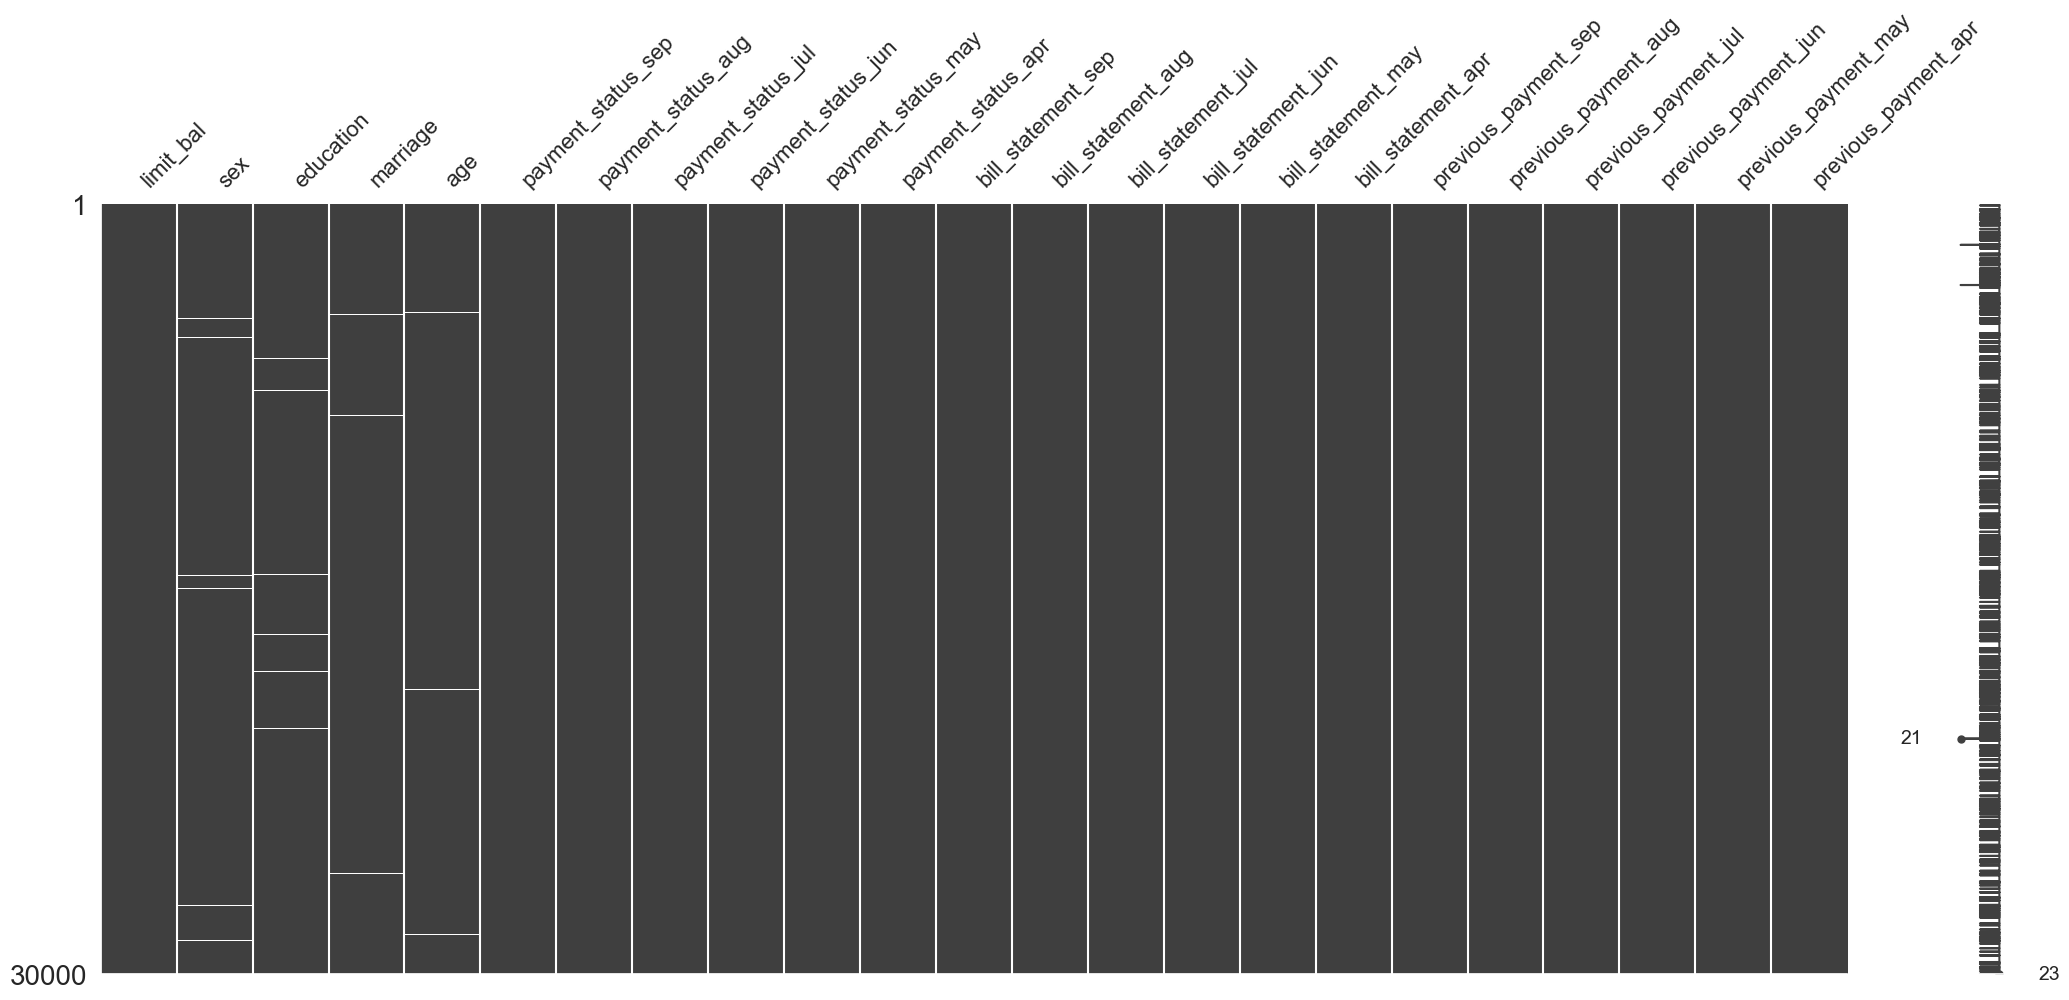

In [573]:
msno.matrix(X)

sns.despine()

### 4. Define columns with missing values per data type

In [574]:
NUM_FEATURES = ["age"]
CAT_FEATURES = ["sex", "education", "marriage"]

### 5. Impute the numerical feature

In [575]:
for col in NUM_FEATURES:
    num_imputer = SimpleImputer(strategy='median')
    num_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = num_imputer.transform(X_test[[col]])

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_51100/2374783196.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_51100/2374783196.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, col] = num_imputer.transform(X_test[[col]])


In [576]:
# # alternative method using pandas

# for feature in NUM_FEATURES:
#     median_value = X_train[feature].median()
#     X_train.loc[:, feature].fillna(median_value, inplace=True)
#     X_test.loc[:, feature].fillna(median_value, inplace=True)

### 6. Impute the categorical features

In [577]:
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_51100/1906417736.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_51100/1906417736.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])
/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_51100/1906417736.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the

In [578]:
# # alternative method using pandas

# for feature in CAT_FEATURES:
#     mode_value = X_train[feature].mode().values[0]
#     X_train.loc[:, feature].fillna(mode_value, inplace=True)
#     X_test.loc[:, feature].fillna(mode_value, inplace=True)

### 7. Verify that there are no missing values

In [579]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20999 entries, 25553 to 27126
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   limit_bal             20999 non-null  int32   
 1   sex                   20999 non-null  object  
 2   education             20999 non-null  object  
 3   marriage              20999 non-null  object  
 4   age                   20999 non-null  float64 
 5   payment_status_sep    20999 non-null  category
 6   payment_status_aug    20999 non-null  category
 7   payment_status_jul    20999 non-null  category
 8   payment_status_jun    20999 non-null  category
 9   payment_status_may    20999 non-null  category
 10  payment_status_apr    20999 non-null  category
 11  bill_statement_sep    20999 non-null  int32   
 12  bill_statement_aug    20999 non-null  int32   
 13  bill_statement_jul    20999 non-null  int32   
 14  bill_statement_jun    20999 non-null  int32   
 15

## There's more

### More visualization available in the missingno library

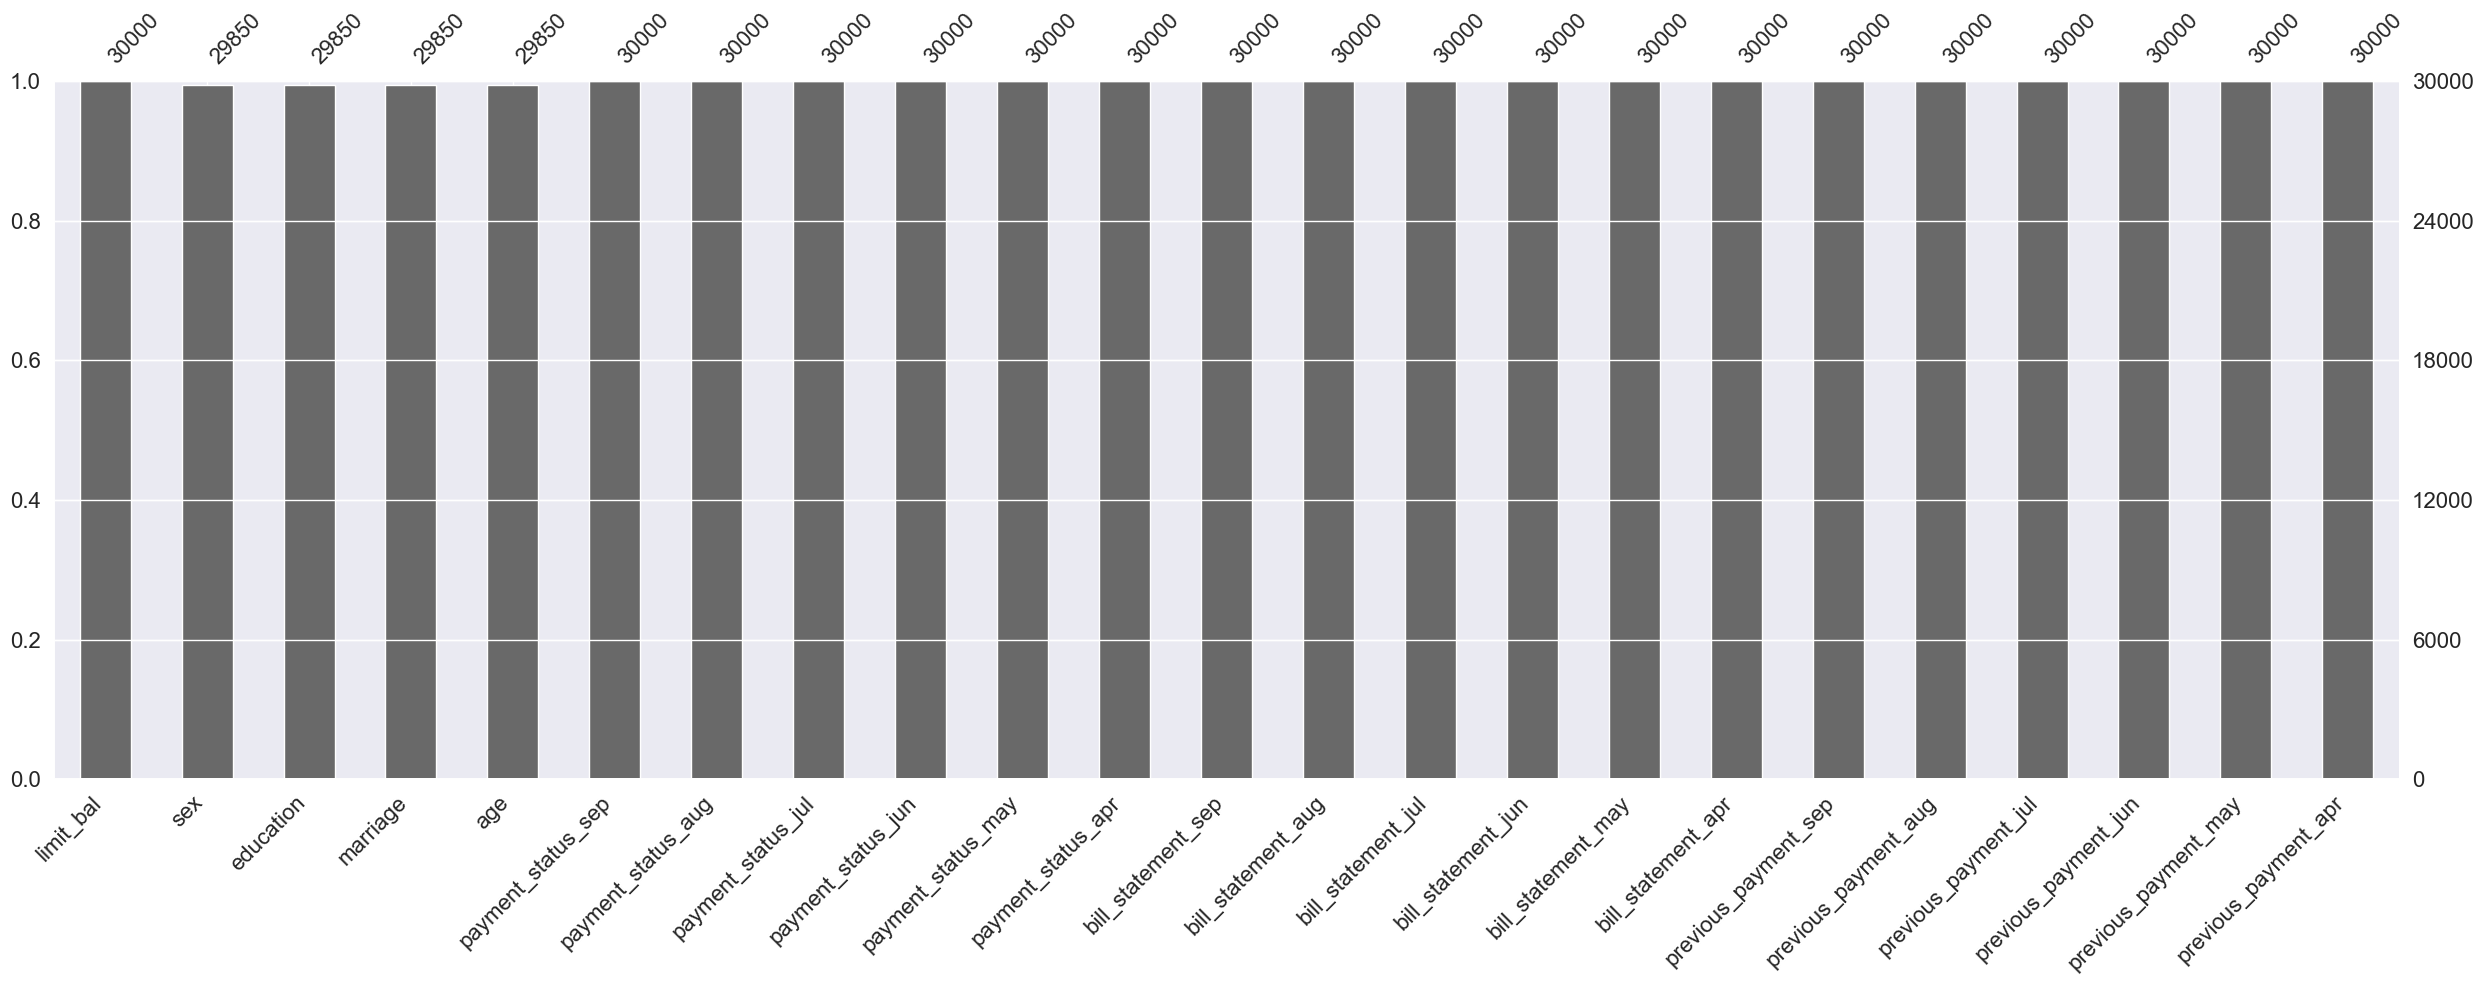

In [580]:
msno.bar(X)

sns.despine()
plt.tight_layout()

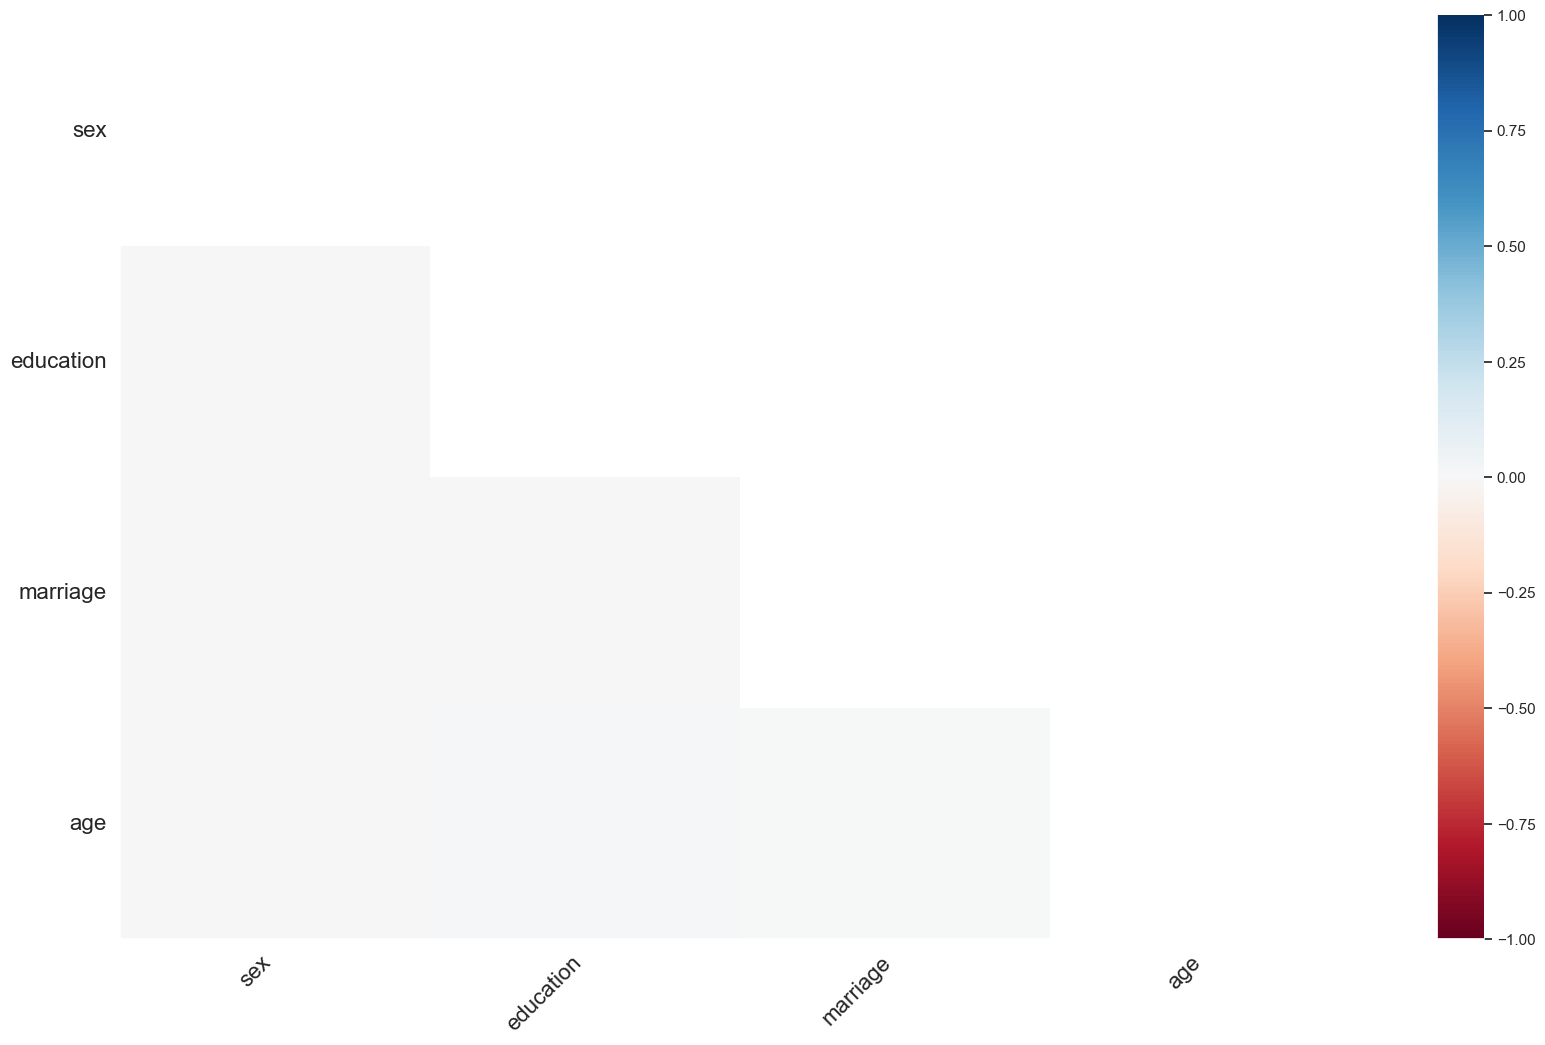

In [581]:
msno.heatmap(X)

sns.despine()
plt.show()

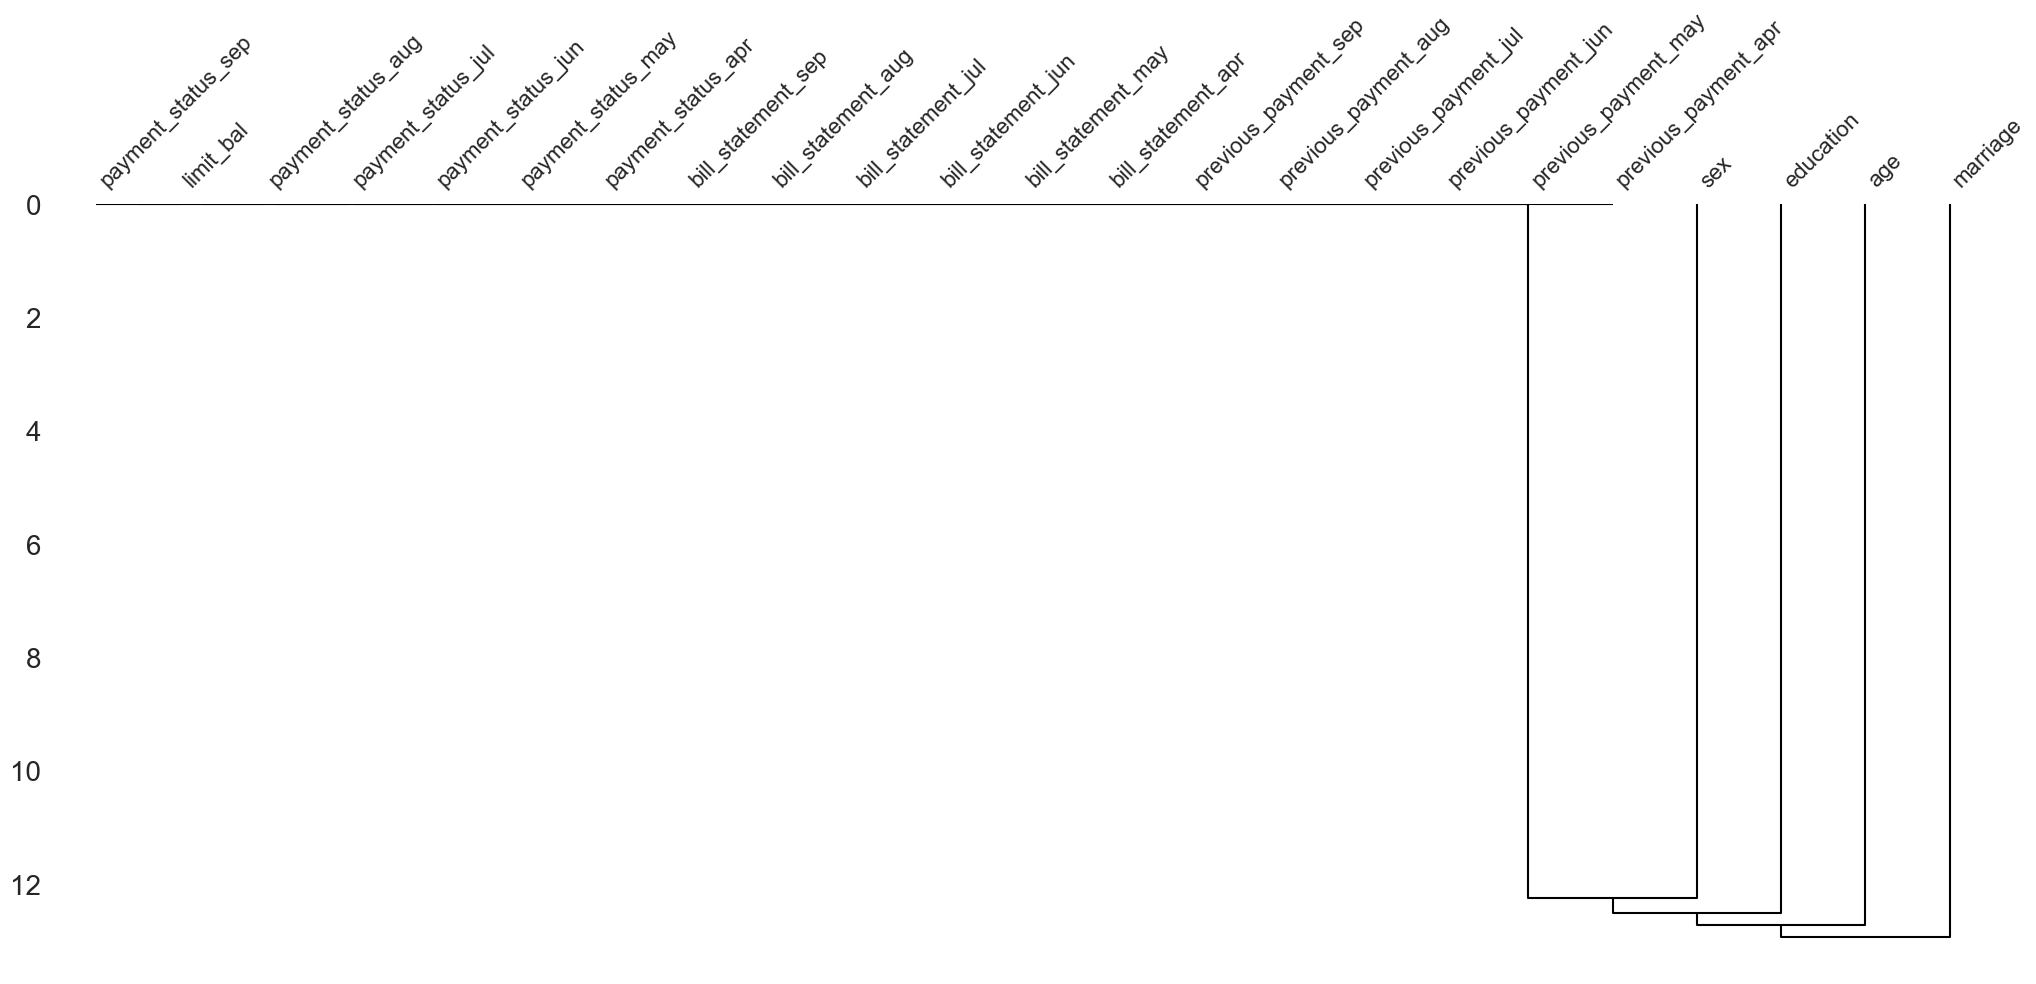

In [582]:
msno.dendrogram(X)

sns.despine()

# Encoding categorical variables

## How to do it

### 1. Import the libraries

In [583]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

### 2. Use Label Encoder a selected column

In [584]:
COL = "education"

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])
X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])

X_train_copy[COL].head()

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_51100/1786378084.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_51100/1786378084.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])


25553    3
14463    0
27267    0
18620    0
12238    3
Name: education, dtype: int64

In [585]:
label_enc.classes_

array(['Graduate School', 'High School', 'Others', 'University'],
      dtype=object)

### 3. Select categorical features for one-hot encoding

In [586]:
cat_features = X_train.select_dtypes(include=['object', 'category'])\
                                     .columns.tolist()
cat_features

['sex',
 'education',
 'marriage',
 'payment_status_sep',
 'payment_status_aug',
 'payment_status_jul',
 'payment_status_jun',
 'payment_status_may',
 'payment_status_apr']

### 4. Instantiate OneHotEncoder object

In [587]:
one_hot_encoder = OneHotEncoder(sparse=False,
                                handle_unknown="error",
                                drop="first")

### 5. Create the colimn transform using the one-hot encoder.

In [588]:
one_hot_transformer = ColumnTransformer(
    [('one_hot', one_hot_encoder, cat_features)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

### 6. Fit the transform

In [589]:
one_hot_transformer.fit(X_train)

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['sex', 'education', 'marriage',
                                  'payment_status_sep', 'payment_status_aug',
                                  'payment_status_jul', 'payment_status_jun',
                                  'payment_status_may',
                                  'payment_status_apr'])],
                  verbose_feature_names_out=False)

### 7. Apply the transformations to both training and test sets

In [590]:
col_names = one_hot_transformer.get_feature_names_out()

X_train_ohe = pd.DataFrame(one_hot_transformer.transform(X_train),
                           columns=col_names,
                           index=X_train.index)
X_test_ohe = pd.DataFrame(one_hot_transformer.transform(X_test),
                          columns=col_names,
                          index=X_test.index)

In [591]:
# below we can see how one-hot encoding increased the shape of out DataFrame
X_train.shape

(20999, 23)

In [592]:
X_train_ohe.shape

(20999, 72)

In [593]:
X_train_ohe.to_csv('./datasets/X_train_ohe.csv', index=True)
X_test_ohe.to_csv('./datasets/X_test_ohe.csv', index=True)
y_train.to_csv('./datasets/y_train.csv', index=True)
y_test.to_csv('./datasets/y_test.csv', index=True)

## There's more

### Using pandas for one-hot encoding

In [594]:
pd.get_dummies(X_train, prefix_sep="_", drop_first=True)

,limit_bal,age,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,...,payment_status_may_Payment delayed 8 months,payment_status_may_Unknown,payment_status_apr_Payment delayed 2 months,payment_status_apr_Payment delayed 3 months,payment_status_apr_Payment delayed 4 months,payment_status_apr_Payment delayed 5 months,payment_status_apr_Payment delayed 6 months,payment_status_apr_Payment delayed 7 months,payment_status_apr_Payment delayed 8 months,payment_status_apr_Unknown
25553,320000,37.0,202442,187475,164694,148160,132230,121191,8211,6100,...,0,1,0,0,0,0,0,0,0,1
14463,500000,35.0,1369,6138,20424,7840,846,790,4769,19629,...,0,1,0,0,0,0,0,0,0,0
27267,160000,42.0,14137,13613,14634,16532,15969,17701,0,1247,...,0,0,1,0,0,0,0,0,0,0
18620,20000,26.0,1000,8930,0,0,0,790,8930,0,...,0,1,0,0,0,0,0,0,0,1
12238,20000,22.0,11999,3617,4165,6323,0,0,1062,1000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25780,200000,32.0,10701,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
13921,120000,24.0,112336,113351,115515,113948,122127,121962,4200,4100,...,0,1,1,0,0,0,0,0,0,0
3794,120000,24.0,75796,76004,67187,49924,33188,19826,3700,2023,...,0,1,0,0,0,0,0,0,0,1
27565,360000,57.0,0,0,860,246,-46,-46,0,860,...,0,0,0,0,0,0,0,0,0,1


### Specifying possible categories for OneHotEncoder

In [595]:
one_hot_encoder = OneHotEncoder(
    categories = [["Male", "Female", "Unknown"]],
    sparse = False,
    handle_unknown = "error",
    drop = "first"
)

one_hot_transformer = ColumnTransformer(
    [("one_hot", one_hot_encoder, ["sex"])]
)

one_hot_transformer.fit(X_train)
one_hot_transformer.get_feature_names_out()

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['one_hot__sex_Female', 'one_hot__sex_Unknown'], dtype=object)

### Category Encoders library

In [596]:
import category_encoders as ce

In [597]:
one_hot_encoder_ce = ce.OneHotEncoder(use_cat_names=True)

In [598]:
one_hot_encoder_ce.fit(X_train)
X_train_ce = one_hot_encoder_ce.transform(X_train)
X_train_ce.head()

,limit_bal,sex_Female,sex_Male,education_University,education_Graduate School,education_High School,education_Others,marriage_Married,marriage_Single,marriage_Others,...,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr
25553,320000,1,0,1,0,0,0,1,0,0,...,164694,148160,132230,121191,8211,6100,6094,5035,4446,5028
14463,500000,0,1,0,1,0,0,0,1,0,...,20424,7840,846,790,4769,19629,157,0,790,860
27267,160000,0,1,0,1,0,0,1,0,0,...,14634,16532,15969,17701,0,1247,2145,0,2000,0
18620,20000,1,0,0,1,0,0,0,1,0,...,0,0,0,790,8930,0,0,0,790,0
12238,20000,1,0,1,0,0,0,0,1,0,...,4165,6323,0,0,1062,1000,10488,0,0,0


In [599]:
y_test

24775    0
9945     0
6150     1
25097    1
7745     0
        ..
25785    0
8614     0
10455    0
1004     1
25371    0
Name: default_payment_next_month, Length: 6031, dtype: int8

# Fitting a decision tree classifier

## Getting ready

In [601]:
import pandas as pd
X_train_ohe = pd.read_csv('./datasets/X_train_ohe.csv', index_col=0)
X_test_ohe = pd.read_csv('./datasets/X_test_ohe.csv', index_col=0)
y_train = pd.read_csv('./datasets/y_train.csv', index_col=0)['default_payment_next_month']
y_test = pd.read_csv('./datasets/y_test.csv', index_col=0)['default_payment_next_month']

In [602]:
y_test

24775    0
9945     0
6150     1
25097    1
7745     0
        ..
25785    0
8614     0
10455    0
1004     1
25371    0
Name: default_payment_next_month, Length: 6031, dtype: int64

## How to do it

### 1. Import the libraries

In [603]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%reload_ext autoreload
%autoreload 2
from evaluation_report import performance_evaluation_report

### 2. Create the instance of the model, fit it to the training data and create prediction

In [605]:
tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_classifier.fit(X_train_ohe, y_train)
y_pred = tree_classifier.predict(X_test_ohe)

### 3. Evaluate the results

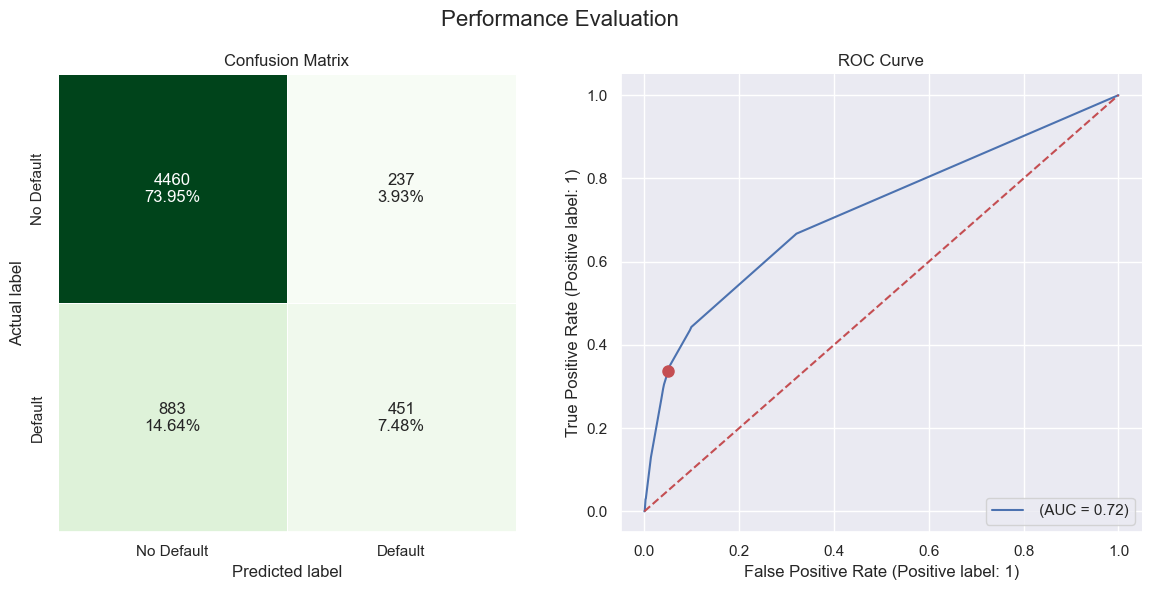

In [607]:
LABELS = ["No Default", "Default"]
tree_perf = performance_evaluation_report(
    tree_classifier,
    X_test_ohe,
    y_test, labels=LABELS, show_plot=True
)

sns.despine()
plt.tight_layout()

In [608]:
tree_perf

{'accuracy': 0.8142928204277897,
 'precision': 0.6555232558139535,
 'recall': 0.33808095952023987,
 'specificity': 0.9495422610176708,
 'f1_score': 0.44609297725024727,
 'cohens_kappa': 0.3479432282617656,
 'matthews_corr_coeff': 0.3755133085921084,
 'roc_auc': 0.7181000728079647,
 'pr_auc': 0.5029677930068098,
 'average_precision': 0.4515318879824874}

### 4. Plot the first few levels of the fitted decision tree

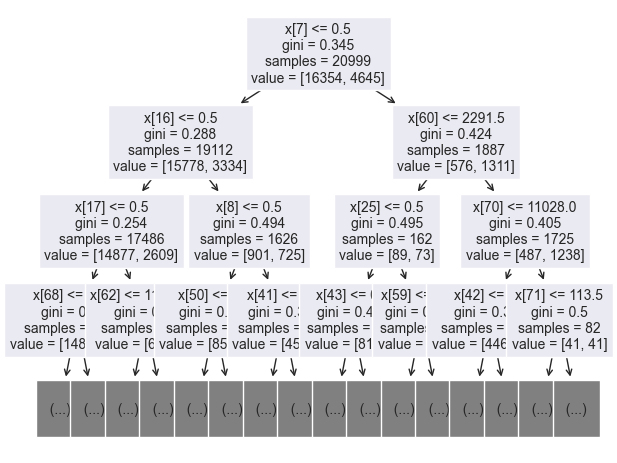

In [609]:
plot_tree(tree_classifier, max_depth=3, fontsize=10)

sns.despine()
plt.tight_layout()

In [611]:
tree_classifier.get_depth()

4

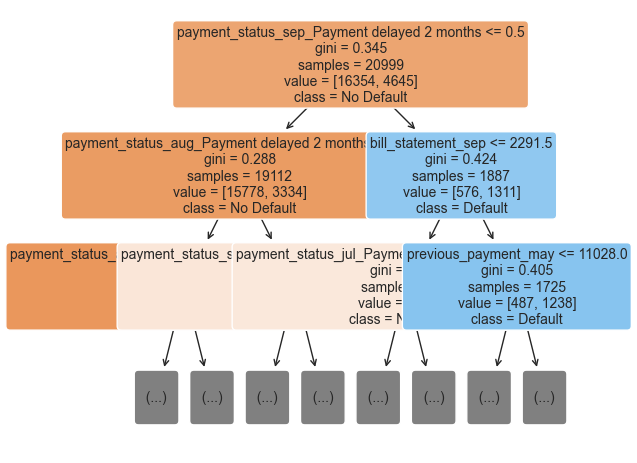

In [616]:
plot_tree(
    tree_classifier,
    max_depth=2,
    feature_names=X_train_ohe.columns,
    class_names=["No Default", "Default"],
    rounded=True,
    filled=True,
    fontsize=10
)

sns.despine()
plt.tight_layout()

## There's more

### Precision-recall curve

In [621]:
y_pred_prob = tree_classifier.predict_proba(X_test_ohe)[:, 1]

precision, recall, _ = metrics.precision_recall_curve(y_test, 
                                                      y_pred_prob)

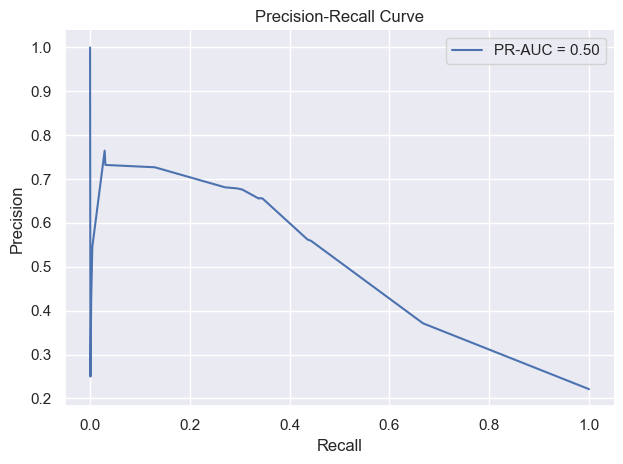

In [622]:
ax = plt.subplot()
ax.plot(recall, precision, 
        label=f"PR-AUC = {metrics.auc(recall, precision):.2f}")
ax.set(title="Precision-Recall Curve", 
       xlabel="Recall", 
       ylabel="Precision")
ax.legend()

sns.despine()
plt.tight_layout()

Text(0.5, 1.0, 'Precision-Recall Curve')

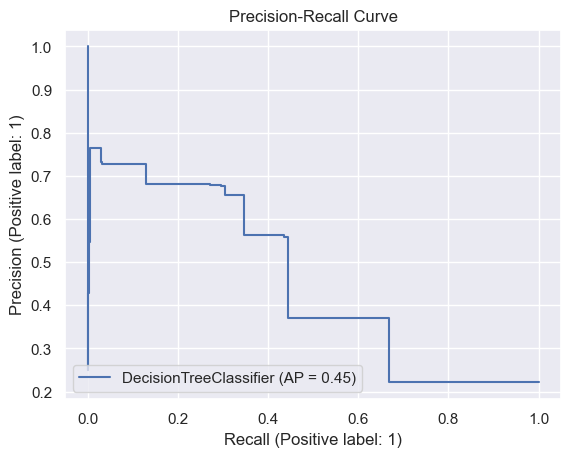

In [624]:
ax = metrics.PrecisionRecallDisplay.from_estimator(
    tree_classifier, X_test_ohe, y_test
)
ax.ax_.set_title("Precision-Recall Curve")

### Visualizing decision trees using dtreeviz

In [633]:
from dtreeviz.trees import *
import dtreeviz

In [627]:
small_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
small_tree.fit(X_train_ohe, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

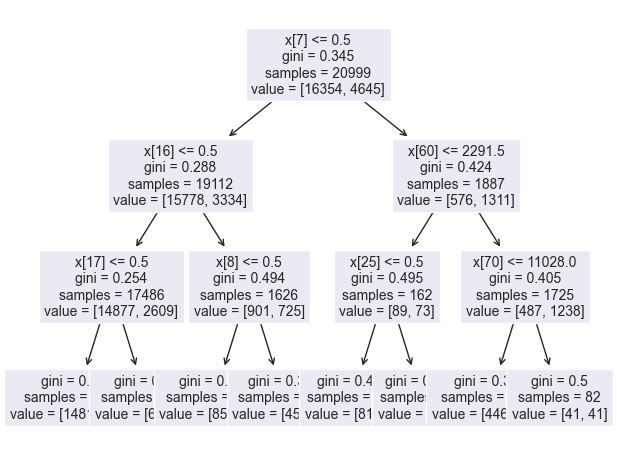

In [629]:
plot_tree(small_tree, max_depth=3, fontsize=10)

sns.despine()
plt.tight_layout()

In [636]:
# viz = dtreeviz(small_tree, 
#                x_data=X_train_ohe,
#                y_data=y_train,
#                feature_names=X_train_ohe.columns, 
#                target_name="Default",
#                class_names=["No", "Yes"], 
#                title="Decision Tree - Loan default data set")
# viz

# Organizing the project with pipleline

## How to do it

### 1. Import the libraries

In [637]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from evaluation_report import performance_evaluation_report

### 2. Load the data, separate the target and create the stratified train-test split.

In [662]:
df = pd.read_csv('./datasets/credit_card_default.csv', na_values='')

X = df.copy()
y = X.pop('default_payment_next_month')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [663]:
X.head()

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr
0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Paid duly,Paid duly,Unknown,...,689,0,0,0,0,689,0,0,0,0
1,120000,Female,University,Single,26.0,Paid duly,Payment delayed 2 months,Unknown,Unknown,Unknown,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,Male,University,Married,57.0,Paid duly,Unknown,Paid duly,Unknown,Unknown,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [664]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

### 3. Prepare lists of numerical/categorical features

In [665]:
num_features = X_train.select_dtypes(include="number") \
                      .columns \
                      .to_list()
cat_features = X_train.select_dtypes(include="object") \
                      .columns \
                      .to_list()

In [666]:
# sanity check that all columns are included in the lists
len(X_train.columns) == len(num_features) + len(cat_features)

True

### 4. Define the numerical pipeline

In [668]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

### 5. Define the categorical pipeline

In [669]:
cat_list = [
    list(X_train[col].dropna().unique()) for col in cat_features
]

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(
        categories=cat_list,
        sparse=False,
        handle_unknown="error",
        drop="first"
    ))
])

### 6. Define the ColumnTransfer object

In [670]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', num_pipeline, num_features),
        ('categorical', cat_pipeline, cat_features)
    ],
    remainder='drop'
)

### 7. Define the full pipeline including the decision tree model

In [671]:
dec_tree = DecisionTreeClassifier(random_state=42)

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dec_tree)
])

### 8. Fit the pipeline to the data

In [672]:
tree_pipeline.fit(X_train, y_train)

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['limit_bal', 'age',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_j...
                                                                                              '3 '
                                                                                              'months',
                                                                                              'Payment '
                                                                                              'delayed '
                                                                                              '7 '
                                                                                              'months',
                                                                                              'Payment '
                                                                                              'delayed '
                                                                                              '5 '
                                                                                              'months',
                                                                                              'Payment '
                                                                                              'delayed '
                                                                                              '8 '
                                                                                              'months']],
                                                                                 drop='first',
                                                                                 sparse=False))]),
                                                  ['sex', 'education',
                                                   'marriage',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### 9. Evaluate the performance of the entire pipeline

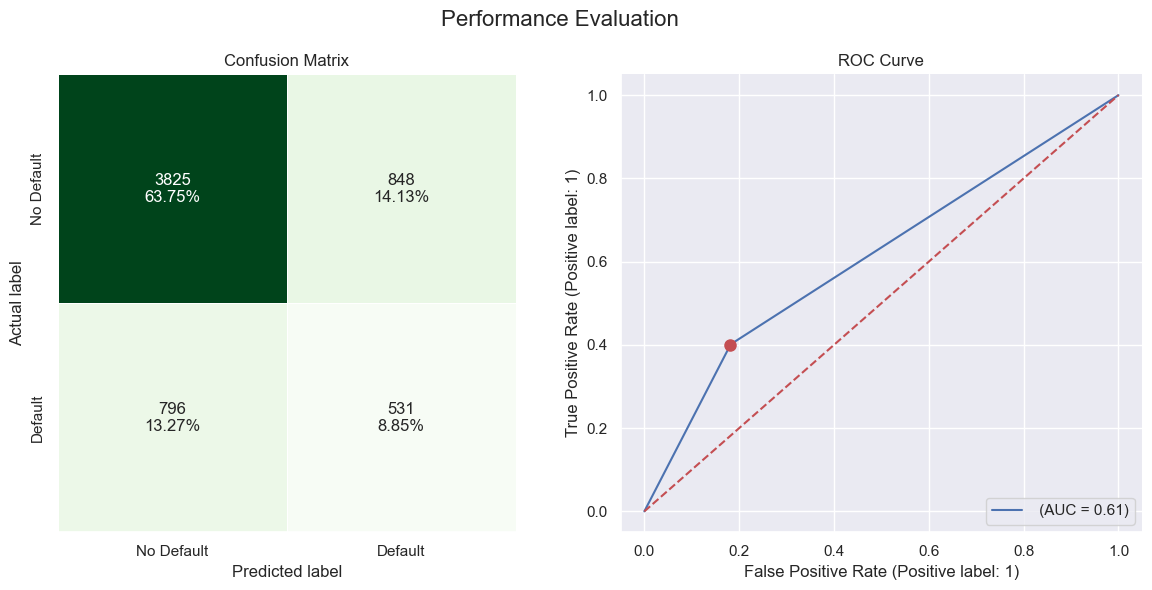

In [675]:
LABELS = ["No Default", "Default"]
tree_perf = performance_evaluation_report(
    tree_pipeline, X_test,
    y_test, labels=LABELS, show_plot=True
)

sns.despine()
plt.tight_layout()

In [676]:
tree_perf

{'accuracy': 0.726,
 'precision': 0.38506163886874545,
 'recall': 0.40015071590052753,
 'specificity': 0.8185319922961695,
 'f1_score': 0.39246119733924617,
 'cohens_kappa': 0.21565721230387658,
 'matthews_corr_coeff': 0.21572360944782054,
 'roc_auc': 0.6096242084633444,
 'pr_auc': 0.45886981023398643,
 'average_precision': 0.28680652536092366}

## There's more

### Adding custom transformers to a pipeline

1. Import the base estimator and transformer classes from `sklearn`

In [677]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

2. Define the OutlierRemover class

In [ ]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, n_std=3):
        self.n_std = n_std

    def fit(self, X, y = None):
        if np.isnan(X).any(axis=None):
            raise ValueError("""There are missing values in the arraay!
            Please remove them.""")

        mean_vec = np.mean(X, axis=0)
        std_vec = np.std(X, axis=0)

        self.upper_band_ = pd.Series(mean_vec + self.n_std * std_vec)
        self.upper_band_ = self.upper_band_.to_frame().transpose()
        self.lower_band_ = pd.Series(mean_vec - self.n_std * std_vec)
        self.lower_band_ = self.lower_band_.to_frame().transpose()
        self.n_features_ = len(self.upper_band_.columns)